In [2]:

import tensorflow as tf

import numpy as np
import pandas as pd
from matplotlib import pyplot as p



In [3]:

x_train = pd.read_csv('../csvTrainImages 13440x1024.csv')
y_train = pd.read_csv('../csvTrainLabel 13440x1.csv')
x_test = pd.read_csv('../csvTestImages 3360x1024.csv')
y_test = pd.read_csv('../csvTestLabel 3360x1.csv')


In [4]:
x_train = np.asarray(x_train).reshape(x_train.shape[0],32,32,1)
x_test = np.asarray(x_test).reshape(x_test.shape[0],32,32,1)


In [5]:

x_train_scaled = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train)) 
x_test_scaled = (x_test - np.min(x_test)) / (np.max(x_test) - np.min(x_test)) 


In [6]:
y_train_labels = tf.keras.utils.to_categorical(y_train) 
y_test_labels = tf.keras.utils.to_categorical(y_test) 


و


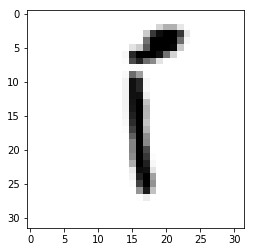

In [7]:

im = np.asarray(x_train[0]).reshape(32,32).T
#print(im.shape)

i = "\xd9\x88"
print(i.encode('latin-1').decode('utf8'))

p.imshow(im,cmap='binary')
p.show()

In [8]:
alph = list('ابتةثجحخدذرزسشصضطظعغفقكلمنهوي')

In [9]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32,kernel_size=(5,5),input_shape=(32,32,1),padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(64,kernel_size=(5,5),padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024,activation='relu'))
model.add(tf.keras.layers.Dense(29,activation='softmax'))

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(x_train_scaled,y_train_labels,epochs=10,validation_data=(x_test_scaled,y_test_labels))

Train on 13439 samples, validate on 3359 samples
Epoch 1/10
13439/13439 [==============================] - 91s 7ms/step - loss: 1.0328 - acc: 0.6758 - val_loss: 0.4147 - val_acc: 0.8773
Epoch 2/10
13439/13439 [==============================] - 86s 6ms/step - loss: 0.2798 - acc: 0.9058 - val_loss: 0.2757 - val_acc: 0.9146
Epoch 3/10
13439/13439 [==============================] - 86s 6ms/step - loss: 0.1504 - acc: 0.9507 - val_loss: 0.2053 - val_acc: 0.9375
Epoch 4/10
13439/13439 [==============================] - 86s 6ms/step - loss: 0.1004 - acc: 0.9670 - val_loss: 0.2250 - val_acc: 0.9336
Epoch 5/10
13439/13439 [==============================] - 92s 7ms/step - loss: 0.0583 - acc: 0.9816 - val_loss: 0.2343 - val_acc: 0.9369
Epoch 6/10
13439/13439 [==============================] - 95s 7ms/step - loss: 0.0499 - acc: 0.9855 - val_loss: 0.2292 - val_acc: 0.9372
Epoch 7/10
13439/13439 [==============================] - 101s 8ms/step - loss: 0.0425 - acc: 0.9867 - val_loss: 0.2835 - val_acc

In [12]:
prediction = model.predict(x_test_scaled)

predicted 0 :  ا
predicted 1 :  ب
predicted 2 :  ب
predicted 3 :  ت
predicted 4 :  ت
predicted 5 :  ة
predicted 6 :  ة
predicted 7 :  ث
predicted 8 :  ث
predicted 9 :  ج


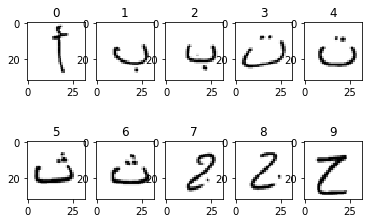

In [13]:
ax = [0,0,0,0,0,0,0,0,0,0]
f, ((ax[0] ,ax[1] , ax[2], ax[3], ax[4]),( ax[5],ax[6] ,ax[7], ax[8], ax[9])) = p.subplots(2,5)

for i in range(10) : 
    ax[i].imshow(x_test[i].reshape(32,32).T,cmap='binary')
    ax[i].set_title('{}'.format(i))
    print("predicted {} :  ".format(i)+alph[np.argmax(prediction[i])-1])
    


In [14]:

model_json = model.to_json()

with open("model.json", "w") as json_file:
    json_file.write(model_json)
    

model.save_weights("model.h5")